In [1]:
# The same can be obtained using the ascii module 
%matplotlib inline
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import glob
import os
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)

In [2]:
csv=glob.glob("vmc*.csv")
print(csv[0])
vmc=ascii.read(csv[0]) # the input file is cs
len(vmc)
vmc

vmc-skyserver.csv


sdss_ra,sdss_dec,wise_ra,wise_dec,r,w1,w2,w3,w4,snr1,snr2,snr3,snr4,plate,mjd,fiberID,subclass,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,neiii_3869_flux,oii_3729_flux,oii_3726_flux,neiii_3869_eqw,oii_3729_eqw,oii_3726_eqw,neiii_3869_flux_err,oii_3729_flux_err,oii_3726_flux_err,oii_flux,FWHM_OII,log([OIII] 5007/HB),log([NII] 6584/Ha),snMedian,z,match_dist,modelMag_g,modelMag_z
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
57.3273340595,0.9077129214,57.3273731,0.9077004,20.07444,15.652,15.407,11.943,8.956,18.9,8.1,1.2,-1.1,1243,52930,454,STARFORMING,43.65908,61.24366,196.0375,59.36782,35.5633,36.75177,9.382659,4.469718,78.30422,63.76364,-1.775748,-31.08262,-31.08262,3.681068,5.489529,5.575337,145.6285,38.24183,-0.1469865376,-0.5187880526,6.248763,0.1178263,0.1475961,19.50191,18.22955
248.875088401,-0.0187570456,248.8751192,-0.0188025,19.12712,14.501,14.069,10.345,8.941,33.5,20.9,15.3,2.3,348,51696,178,STARBURST,33.43206,108.2215,456.0371,159.0363,56.45742,38.20727,17.12584,0.9543909,45.31836,36.45705,0.2872661,-8.187232,-8.187232,2.676124,3.59005,3.559922,83.30547,35.02274,-0.5101505019,-0.4575039009,13.91164,0.1636471,0.1976437,18.25311,16.90248
198.110835262,0.4102748614,198.1108303,0.4102931,18.51261,14.44,14.245,10.393,8.105,33.4,20.3,17.0,4.9,295,51985,437,STARBURST,77.52076,153.5297,604.7886,234.4109,97.9293,71.29226,13.30992,8.135024,152.6959,134.3449,-0.2736238,-26.44182,-26.44182,4.097154,6.16996,6.219018,285.6977,28.74356,-0.2967743967,-0.4116258436,12.93723,0.06381848,0.06803671,17.90464,16.79804
238.889882878,1.2023145003,238.889924,1.2023304,18.82475,14.145,13.846,9.999,8.322,34.7,24.7,21.5,4.5,343,51692,450,STARFORMING,16.77982,63.76425,298.8959,108.5769,52.9314,43.66903,10.56628,4.659949,53.61833,35.44595,-0.7782736,-14.27668,-14.27668,2.837114,3.857016,3.673969,90.59041,59.38231,-0.5797899258,-0.439782634,13.50972,0.06984673,0.1586994,17.874,16.53594
201.554657776,-1.1542528009,201.5547613,-1.1542924,24.80208,14.587,14.361,10.494,8.501,34.4,22.6,18.3,4.8,297,51663,128,STARFORMING,26.87687,127.3818,488.1217,156.298,88.1355,64.84895,12.11164,-1.32182,73.33244,55.18125,0.9033135,-12.72681,-12.72681,5.359032,6.962041,6.692756,127.2196,20.87318,-0.6757285956,-0.4945747971,11.48992,0.05403716,0.3989509,22.46572,16.70459
201.554657776,-1.1542528009,201.5547613,-1.1542924,24.80208,14.587,14.361,10.494,8.501,34.4,22.6,18.3,4.8,297,51959,121,STARFORMING,28.99767,136.2879,537.0157,171.7394,96.44588,65.18581,12.48615,-2.93854,90.90551,74.81953,1.813259,-13.31366,-13.31366,4.509169,6.944731,6.845451,164.2871,19.56557,-0.6720940469,-0.495117022,12.55413,0.05401157,0.3989509,22.46572,16.70459
203.544201049,-1.2179319389,203.5441819,-1.2179392,18.66769,14.946,14.713,10.721,8.541,30.6,17.8,14.3,4.3,298,51955,121,--,174.0029,180.0344,637.1793,186.33,107.4196,77.78905,21.39208,12.01614,196.5442,205.3774,-0.2689505,-39.70307,-39.70307,4.044347,6.505532,6.555148,400.2851,30.65997,-0.0147990058,-0.5339788525,13.98157,0.09958303,0.07370199,18.11913,17.35625
203.544201049,-1.2179319389,203.5441819,-1.2179392,18.66769,14.946,14.713,10.721,8.541,30.6,17.8,14.3,4.3,911,52426,525,STARBURST,166.9486,165.9397,618.1494,186.5386,114.4883,81.78104,16.2432,14.93912,176.2503,227.4521,-1.195049,-33.78641,-33.78641,3.241412,6.033196,6.213682,409.6674,32.7892,0.0026324263,-0.5203248355,15.00654,0.09952803,0.07370199,18.11913,17.35625
220.921031799,-1.0791270318,220.9211187,-1.0791155,18.47694,14.29,14.037,10.412,8.155,39.8,26.3,20.4,6.5,308,51662,292,STARBURST,329.2221,262.5674,933.9257,212.9181,174.003,126.2741,30.94635,20.75256,335.483,323.3354,-0.9022617,-41.72128,-41.72128,3.312274,7.673364,7.329123,668.0085,29.03043,

In [3]:
oiii_5007 = vmc['oiii_5007_flux'].data
h_beta = vmc['h_beta_flux'].data
nii_6584 = vmc['nii_6584_flux'].data
h_alpha = vmc['h_alpha_flux'].data
sii_6717 = vmc['sii_6717_flux'].data
sii_6731 = vmc['sii_6731_flux'].data
oi_6300 = vmc['oi_6300_flux'].data
ra_wise=vmc['sdss_ra'].data
dec_wise=vmc['sdss_ra'].data
sub_sdss=vmc['subclass'].data

In [4]:
oiii_hb=np.log10(oiii_5007/h_beta)

nii_ha=np.log10(nii_6584/h_alpha)
sii_ha=np.log10((sii_6717+sii_6731)/h_alpha)
oi_ha=np.log10(oi_6300/h_alpha)

# BPT-NII

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


AGN number: 2494 out of 30000
AGN percentage: 8.31333333333


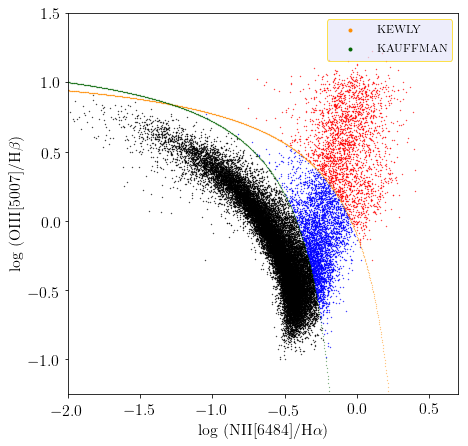

In [5]:
x=np.linspace(nii_ha.min(),nii_ha.max(),1000)
kewl_oiii = 0.61/((x)-0.47) + 1.19
kauffman_oiii = 0.61/((x)-0.05) + 1.3

fig=plt.figure(figsize=(7,7))  # set the size of the figure
ax=fig.add_subplot(111)


# for cond in ([(oiii_hb>kewl_oiii),((oiii_hb<kewl_oiii) & (oiii_hb>kauffman_oiii)),(oiii_hb<kauffman_oiii)]):
#     ax.plot((nii_ha[cond],oiii_hb[cond]),'.')

cond1=(oiii_hb>0.61/((nii_ha)-0.47) + 1.19)
ax.plot(nii_ha[cond1],oiii_hb[cond1],'.r',markersize=0.7)

cond2=((oiii_hb<0.61/((nii_ha)-0.47) + 1.19) & (oiii_hb> 0.61/((nii_ha)-0.05) + 1.3))
ax.plot(nii_ha[cond2],oiii_hb[cond2],'.',c='blue',markersize=0.7)

cond3=-cond1 & -cond2#(oiii_hb<kauffman_oiii)
ax.plot(nii_ha[cond3],oiii_hb[cond3],'.k',markersize=0.7)

print('AGN number:',np.sum(cond1),'out of',len(nii_ha))
print('AGN percentage:',100*np.sum(cond1)/(np.sum(cond1)+np.sum(cond2)+np.sum(cond3)))

# ax.set_facecolor('xkcd:black')

ax.plot(x,kewl_oiii,'.',c='darkorange',markersize=0.4,label=r'KEWLY')
ax.plot(x,kauffman_oiii,'.',c='darkgreen',markersize=0.4, label=r'KAUFFMAN')
ax.set_ylim(-1.25,1.5)
ax.set_xlim(-2,0.7)


ax.set_xlabel(r'log (NII[6484]/H$\alpha$)')
ax.set_ylabel(r'log (OIII[5007]/H$\beta$)')
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=15,framealpha=0.7,prop={'size':12})
plt.savefig('bpt1.png')
plt.show()

# BPT-SII

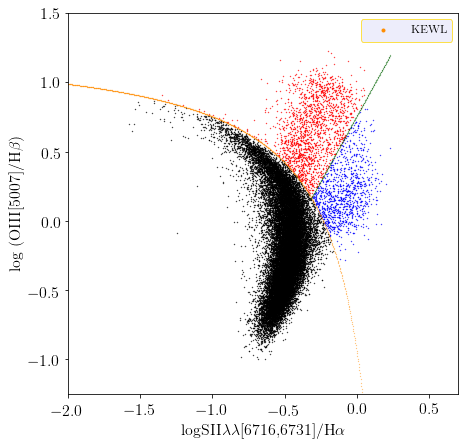

In [6]:
x=np.linspace(sii_ha.min(),sii_ha.max(),1000)
kewl_oiii = 0.72 / (x - 0.32) + 1.30
kauffman_oiii = 1.89 * x + 0.76

fig2=plt.figure(figsize=(7,7))  # set the size of the figure
ax=fig2.add_subplot(111)


cond1=(oiii_hb<(0.72 / (sii_ha - 0.32) + 1.30))
ax.plot(sii_ha[cond1],oiii_hb[cond1],'.k',markersize=0.7)

cond2=[(oiii_hb>(0.72 / (sii_ha - 0.32) + 1.30)) & (oiii_hb<(1.89 * sii_ha + 0.76))]
ax.plot(sii_ha[cond2],oiii_hb[cond2],'.',c='blue',markersize=0.7)

cond3=[(oiii_hb>(0.72 / (sii_ha - 0.32) + 1.30)) & (oiii_hb>(1.89 * sii_ha + 0.76))]
ax.plot(sii_ha[cond3],oiii_hb[cond3],'.r',markersize=0.7)
# ax.plot(sii_ha,oiii_hb,'.k',markersize=0.7)

# ax.set_facecolor('xkcd:black')

ax.plot(x,kewl_oiii,'.',c='darkorange',markersize=0.4,label=r'KEWL')
ax.plot(x[kauffman_oiii>kewl_oiii],kauffman_oiii[kauffman_oiii>kewl_oiii],'.',c='darkgreen',markersize=0.4)
ax.set_ylim(-1.25,1.5)
ax.set_xlim(-2,0.7)
ax.set_xlabel(r'logSII$\lambda\lambda$[6716,6731]/H$\alpha$')
ax.set_ylabel(r'log (OIII[5007]/H$\beta$)')
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=15,framealpha=0.7,prop={'size':12})
plt.savefig('bpt2.png')
plt.show()

# BPT-OI

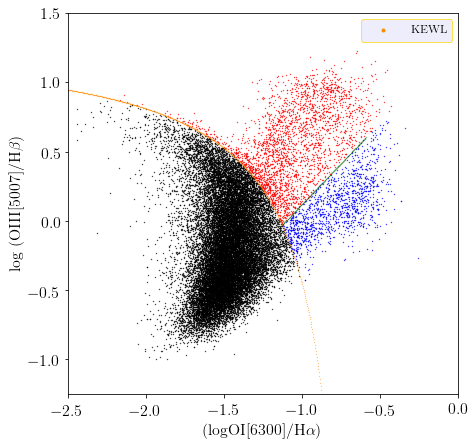

In [7]:
x=np.linspace(oi_ha.min(),oi_ha.max(),1000)
kewl_oiii = 0.73 / (x + 0.59) + 1.33
kauffman_oiii = 1.18 * (x) + 1.30


fig=plt.figure(figsize=(7,7))  # set the size of the figure
ax=fig.add_subplot(111)


cond1=[(oiii_hb<(0.73 / ((oi_ha) + 0.59) + 1.33)) & (oi_ha<-0.59)]
ax.plot(oi_ha[cond1],oiii_hb[cond1],'.k',markersize=0.7)

cond2=[(oiii_hb>(0.73 / ((oi_ha) + 0.59) + 1.33)) & (oiii_hb<(1.18 * (oi_ha) + 1.30))]
ax.plot(oi_ha[cond2],oiii_hb[cond2],'.',c='blue',markersize=0.7)

cond3=[(oiii_hb>(0.73 / ((oi_ha) + 0.59) + 1.33)) & (oiii_hb>(1.18 * (oi_ha) + 1.30))]
ax.plot(oi_ha[cond3],oiii_hb[cond3],'.r',markersize=0.7)
# ax.plot(sii_ha,oiii_hb,'.k',markersize=0.7)

cond4=[(oiii_hb<(0.73 / ((oi_ha) + 0.59) + 1.33)) & (oiii_hb<(1.18 * (oi_ha) + 1.30)) & (oi_ha>-0.59)]
ax.plot(oi_ha[cond4],oiii_hb[cond4],'.',c='blue',markersize=0.7)

cond5=[(oiii_hb<(0.73 / ((oi_ha) + 0.59) + 1.33)) & (oiii_hb>(1.18 * (oi_ha) + 1.30)) & (oi_ha>-0.59)]
ax.plot(oi_ha[cond5],oiii_hb[cond5],'.r',markersize=0.7)

# ax.set_facecolor('xkcd:black')

ax.plot(x,kewl_oiii,'.',c='darkorange',markersize=0.4,label=r'KEWL')
ax.plot(x[kauffman_oiii>kewl_oiii],kauffman_oiii[kauffman_oiii>kewl_oiii],'.',c='darkgreen',markersize=0.4)
ax.set_ylim(-1.25,1.5)
ax.set_xlim(-2.5,0)
ax.set_xlabel(r'(logOI[6300]/H$\alpha$)')
ax.set_ylabel(r'log (OIII[5007]/H$\beta$)')
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=15,framealpha=0.7,prop={'size':12})
plt.savefig('bpt3.png')
plt.show()

# Task 1b

30000


/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


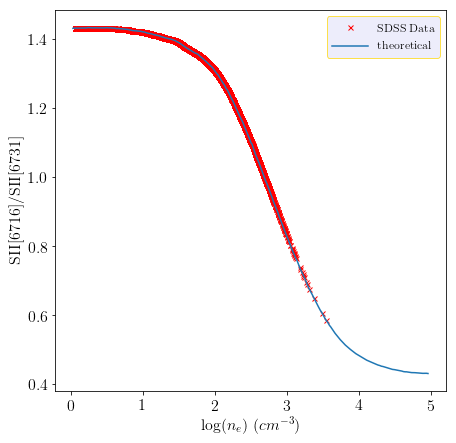

In [8]:
sii_ne=ascii.read("sii_ne.csv")
sii_fig=sii_ne["sii"].data
ne_fig=sii_ne["ne"].data

sii_ratio=sii_6717/sii_6731
ne_interp = interp1d(sii_fig,ne_fig)

fig=plt.figure(figsize=(7,7))  # set the size of the figure
ax=fig.add_subplot(111)

ax.set_xlabel("log$(n_e)$ ($cm^{-3}$)")
ax.set_ylabel("SII[6716]/SII[6731]")

ne=np.zeros(len(sii_ratio))
print(len(ne))
for i in range(len(sii_ratio)):
    if((sii_ratio[i]>sii_fig.max()) or (sii_ratio[i]<sii_fig.min())):
        continue
    ne[i]=ne_interp(sii_ratio[i])

ax.plot(np.log10(ne),sii_ratio,'xr',markersize=5, alpha=1, label='SDSS Data')
ax.plot(np.log10(ne_fig),sii_fig,'-',label="theoretical")
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=1,framealpha=0.7,prop={'size':12})
plt.savefig('ne.png')

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/home/varun/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[  2.50000000e+00  -4.61168602e+18   1.50000000e+00 ...,  -4.61168602e+18
   1.00000000e+00   1.50000000e+00]


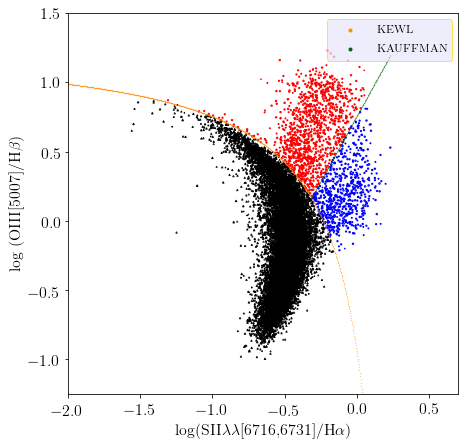

In [9]:
x=np.linspace(sii_ha.min(),sii_ha.max(),1000)
kewl_oiii = 0.72 / (x - 0.32) + 1.30
kauffman_oiii = 1.89 * x + 0.76

fig2=plt.figure(figsize=(7,7))  # set the size of the figure
ax=fig2.add_subplot(111)

s=np.log10(ne[cond1])
size=(2*s).astype(int)/2
print(size)


cond1=(oiii_hb<(0.72 / (sii_ha - 0.32) + 1.30))
ax.scatter(sii_ha[cond1],oiii_hb[cond1],edgecolor='black',s=size, marker='^',facecolors='none')

cond2=[(oiii_hb>(0.72 / (sii_ha - 0.32) + 1.30)) & (oiii_hb<(1.89 * sii_ha + 0.76))]
ax.scatter(sii_ha[cond2],oiii_hb[cond2],edgecolor='blue',s=size,facecolors='none')

cond3=[(oiii_hb>(0.72 / (sii_ha - 0.32) + 1.30)) & (oiii_hb>(1.89 * sii_ha + 0.76))]
ax.scatter(sii_ha[cond3],oiii_hb[cond3],edgecolor='red',s=size,facecolors='none')
# ax.plot(sii_ha,oiii_hb,'.k',markersize=0.7)

# ax.set_facecolor('xkcd:black')

ax.plot(x,kewl_oiii,'.',c='darkorange',markersize=0.4,label=r'KEWL')
ax.plot(x[kauffman_oiii>kewl_oiii],kauffman_oiii[kauffman_oiii>kewl_oiii],'.',c='darkgreen',markersize=0.4, label=r'KAUFFMAN')
ax.set_ylim(-1.25,1.5)
ax.set_xlim(-2,0.7)
ax.set_xlabel(r'log(SII$\lambda\lambda$[6716,6731]/H$\alpha$)')
ax.set_ylabel(r'log (OIII[5007]/H$\beta$)')
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=15,framealpha=0.7,prop={'size':12})
plt.savefig('bpt4.png')
plt.show()

# TASK 2

In [10]:
def calc_kcor(filter_name, redshift, colour_name, colour_value):
    """
    K-corrections calculator in Python. See http://kcor.sai.msu.ru for the 
    reference. Available filter-colour combinations must be present in the 
    `coeff` dictionary keys.

    @type   filter_name: string    
    @param  filter_name: Name of the filter to calculate K-correction for, e.g. 
                         'u', 'g', 'r' for some of the SDSS filters, or 'J2', 
                         'H2', 'Ks2' for 2MASS filters (must be present in 
                         `coeff` dictionary)
    @type      redshift: float    
    @param     redshift: Redshift of a galaxy, should be between 0.0 and 0.5 (no
                         check is made, however)
    @type   colour_name: string    
    @param  colour_name: Human name of the colour, e.g. 'u - g', 'g - r', 
                         'V - Rc', 'J2 - Ks2' (must be present in `coeff` dictionary)
    @type  colour_value: float    
    @param colour_value: Value of the galaxy's colour, specified in colour_name    
    @rtype:              float
    @return:             K-correction in specified filter for given redshift and 
                         colour
    @version:            2012
    @author:             Chilingarian, I., Melchior. A.-L., and Zolotukhin, I.
    @license:            Simplified BSD license, see http://kcor.sai.msu.ru/license.txt

    Usage example:
    
        >>> calc_kcor('g', 0.2, 'g - r', 1.1)
        0.5209713975999992
        >>> calc_kcor('Ic', 0.4, 'V - Ic', 2.0)
        0.310069919999993
        >>> calc_kcor('H', 0.5, 'H - K', 0.1)
        -0.14983142499999502
        
    """
    coeff = {

        'B_BRc': [
            [0,0,0,0],
            [-1.99412,3.45377,0.818214,-0.630543],
            [15.9592,-3.99873,6.44175,0.828667],
            [-101.876,-44.4243,-12.6224,0],
            [299.29,86.789,0,0],
            [-304.526,0,0,0],
        ],
        
        'B_BIc': [
            [0,0,0,0],
            [2.11655,-5.28948,4.5095,-0.8891],
            [24.0499,-4.76477,-1.55617,1.85361],
            [-121.96,7.73146,-17.1605,0],
            [236.222,76.5863,0,0],
            [-281.824,0,0,0],
        ],

        'H2_H2Ks2': [
            [0,0,0,0],
            [-1.88351,1.19742,10.0062,-18.0133],
            [11.1068,20.6816,-16.6483,139.907],
            [-79.1256,-406.065,-48.6619,-430.432],
            [551.385,1453.82,354.176,473.859],
            [-1728.49,-1785.33,-705.044,0],
            [2027.48,950.465,0,0],
            [-741.198,0,0,0],
        ],

        'H2_J2H2': [
            [0,0,0,0],
            [-4.99539,5.79815,4.19097,-7.36237],
            [70.4664,-202.698,244.798,-65.7179],
            [-142.831,553.379,-1247.8,574.124],
            [-414.164,1206.23,467.602,-799.626],
            [763.857,-2270.69,1845.38,0],
            [-563.812,-1227.82,0,0],
            [1392.67,0,0,0],
        ],

        'Ic_VIc': [
            [0,0,0,0],
            [-7.92467,17.6389,-15.2414,5.12562],
            [15.7555,-1.99263,10.663,-10.8329],
            [-88.0145,-42.9575,46.7401,0],
            [266.377,-67.5785,0,0],
            [-164.217,0,0,0],
        ],

        'J2_J2Ks2': [
            [0,0,0,0],
            [-2.85079,1.7402,0.754404,-0.41967],
            [24.1679,-34.9114,11.6095,0.691538],
            [-32.3501,59.9733,-29.6886,0],
            [-30.2249,43.3261,0,0],
            [-36.8587,0,0,0],
        ],

        'J2_J2H2': [
            [0,0,0,0],
            [-0.905709,-4.17058,11.5452,-7.7345],
            [5.38206,-6.73039,-5.94359,20.5753],
            [-5.99575,32.9624,-72.08,0],
            [-19.9099,92.1681,0,0],
            [-45.7148,0,0,0],
        ],

        'Ks2_J2Ks2': [
            [0,0,0,0],
            [-5.08065,-0.15919,4.15442,-0.794224],
            [62.8862,-61.9293,-2.11406,1.56637],
            [-191.117,212.626,-15.1137,0],
            [116.797,-151.833,0,0],
            [41.4071,0,0,0],
        ],

        'Ks2_H2Ks2': [
            [0,0,0,0],
            [-3.90879,5.05938,10.5434,-10.9614],
            [23.6036,-97.0952,14.0686,28.994],
            [-44.4514,266.242,-108.639,0],
            [-15.8337,-117.61,0,0],
            [28.3737,0,0,0],
        ],

        'Rc_BRc': [
            [0,0,0,0],
            [-2.83216,4.64989,-2.86494,0.90422],
            [4.97464,5.34587,0.408024,-2.47204],
            [-57.3361,-30.3302,18.4741,0],
            [224.219,-19.3575,0,0],
            [-194.829,0,0,0],
        ],

        'Rc_VRc': [
            [0,0,0,0],
            [-3.39312,16.7423,-29.0396,25.7662],
            [5.88415,6.02901,-5.07557,-66.1624],
            [-50.654,-13.1229,188.091,0],
            [131.682,-191.427,0,0],
            [-36.9821,0,0,0],
        ],

        'U_URc': [
            [0,0,0,0],
            [2.84791,2.31564,-0.411492,-0.0362256],
            [-18.8238,13.2852,6.74212,-2.16222],
            [-307.885,-124.303,-9.92117,12.7453],
            [3040.57,428.811,-124.492,-14.3232],
            [-10677.7,-39.2842,197.445,0],
            [16022.4,-641.309,0,0],
            [-8586.18,0,0,0],
        ],

        'V_VIc': [
            [0,0,0,0],
            [-1.37734,-1.3982,4.76093,-1.59598],
            [19.0533,-17.9194,8.32856,0.622176],
            [-86.9899,-13.6809,-9.25747,0],
            [305.09,39.4246,0,0],
            [-324.357,0,0,0],
        ],

        'V_VRc': [
            [0,0,0,0],
            [-2.21628,8.32648,-7.8023,9.53426],
            [13.136,-1.18745,3.66083,-41.3694],
            [-117.152,-28.1502,116.992,0],
            [365.049,-93.68,0,0],
            [-298.582,0,0,0],
        ],

        'FUV_FUVNUV': [
            [0,0,0,0],
            [-0.866758,0.2405,0.155007,0.0807314],
            [-1.17598,6.90712,3.72288,-4.25468],
            [135.006,-56.4344,-1.19312,25.8617],
            [-1294.67,245.759,-84.6163,-40.8712],
            [4992.29,-477.139,174.281,0],
            [-8606.6,316.571,0,0],
            [5504.2,0,0,0],
        ],

        'FUV_FUVu': [
            [0,0,0,0],
            [-1.67589,0.447786,0.369919,-0.0954247],
            [2.10419,6.49129,-2.54751,0.177888],
            [15.6521,-32.2339,4.4459,0],
            [-48.3912,37.1325,0,0],
            [37.0269,0,0,0],
        ],

        'g_gi': [
            [0,0,0,0],
            [1.59269,-2.97991,7.31089,-3.46913],
            [-27.5631,-9.89034,15.4693,6.53131],
            [161.969,-76.171,-56.1923,0],
            [-204.457,217.977,0,0],
            [-50.6269,0,0,0],
        ],

        'g_gz': [
            [0,0,0,0],
            [2.37454,-4.39943,7.29383,-2.90691],
            [-28.7217,-20.7783,18.3055,5.04468],
            [220.097,-81.883,-55.8349,0],
            [-290.86,253.677,0,0],
            [-73.5316,0,0,0],
        ],

        'g_gr': [
            [0,0,0,0],
            [-2.45204,4.10188,10.5258,-13.5889],
            [56.7969,-140.913,144.572,57.2155],
            [-466.949,222.789,-917.46,-78.0591],
            [2906.77,1500.8,1689.97,30.889],
            [-10453.7,-4419.56,-1011.01,0],
            [17568,3236.68,0,0],
            [-10820.7,0,0,0],
        ],

        'H_JH': [
            [0,0,0,0],
            [-1.6196,3.55254,1.01414,-1.88023],
            [38.4753,-8.9772,-139.021,15.4588],
            [-417.861,89.1454,808.928,-18.9682],
            [2127.81,-405.755,-1710.95,-14.4226],
            [-5719,731.135,1284.35,0],
            [7813.57,-500.95,0,0],
            [-4248.19,0,0,0],
        ],

        'H_HK': [
            [0,0,0,0],
            [0.812404,7.74956,1.43107,-10.3853],
            [-23.6812,-235.584,-147.582,188.064],
            [283.702,2065.89,721.859,-713.536],
            [-1697.78,-7454.39,-1100.02,753.04],
            [5076.66,11997.5,460.328,0],
            [-7352.86,-7166.83,0,0],
            [4125.88,0,0,0],
        ],

        'i_gi': [
            [0,0,0,0],
            [-2.21853,3.94007,0.678402,-1.24751],
            [-15.7929,-19.3587,15.0137,2.27779],
            [118.791,-40.0709,-30.6727,0],
            [-134.571,125.799,0,0],
            [-55.4483,0,0,0],
        ],

        'i_ui': [
            [0,0,0,0],
            [-3.91949,3.20431,-0.431124,-0.000912813],
            [-14.776,-6.56405,1.15975,0.0429679],
            [135.273,-1.30583,-1.81687,0],
            [-264.69,15.2846,0,0],
            [142.624,0,0,0],
        ],

        'J_JH': [
            [0,0,0,0],
            [0.129195,1.57243,-2.79362,-0.177462],
            [-15.9071,-2.22557,-12.3799,-2.14159],
            [89.1236,65.4377,36.9197,0],
            [-209.27,-123.252,0,0],
            [180.138,0,0,0],
        ],

        'J_JK': [
            [0,0,0,0],
            [0.0772766,2.17962,-4.23473,-0.175053],
            [-13.9606,-19.998,22.5939,-3.99985],
            [97.1195,90.4465,-21.6729,0],
            [-283.153,-106.138,0,0],
            [272.291,0,0,0],
        ],

        'K_HK': [
            [0,0,0,0],
            [-2.83918,-2.60467,-8.80285,-1.62272],
            [14.0271,17.5133,42.3171,4.8453],
            [-77.5591,-28.7242,-54.0153,0],
            [186.489,10.6493,0,0],
            [-146.186,0,0,0],
        ],

        'K_JK': [
            [0,0,0,0],
            [-2.58706,1.27843,-5.17966,2.08137],
            [9.63191,-4.8383,19.1588,-5.97411],
            [-55.0642,13.0179,-14.3262,0],
            [131.866,-13.6557,0,0],
            [-101.445,0,0,0],
        ],

        'NUV_NUVr': [
            [0,0,0,0],
            [2.2112,-1.2776,0.219084,0.0181984],
            [-25.0673,5.02341,-0.759049,-0.0652431],
            [115.613,-5.18613,1.78492,0],
            [-278.442,-5.48893,0,0],
            [261.478,0,0,0],
        ],

        'NUV_NUVg': [
            [0,0,0,0],
            [2.60443,-2.04106,0.52215,0.00028771],
            [-24.6891,5.70907,-0.552946,-0.131456],
            [95.908,-0.524918,1.28406,0],
            [-208.296,-10.2545,0,0],
            [186.442,0,0,0],
        ],

        'r_gr': [
            [0,0,0,0],
            [1.83285,-2.71446,4.97336,-3.66864],
            [-19.7595,10.5033,18.8196,6.07785],
            [33.6059,-120.713,-49.299,0],
            [144.371,216.453,0,0],
            [-295.39,0,0,0],
        ],

        'r_ur': [
            [0,0,0,0],
            [3.03458,-1.50775,0.576228,-0.0754155],
            [-47.8362,19.0053,-3.15116,0.286009],
            [154.986,-35.6633,1.09562,0],
            [-188.094,28.1876,0,0],
            [68.9867,0,0,0],
        ],

        'u_ur': [
            [0,0,0,0],
            [10.3686,-6.12658,2.58748,-0.299322],
            [-138.069,45.0511,-10.8074,0.95854],
            [540.494,-43.7644,3.84259,0],
            [-1005.28,10.9763,0,0],
            [710.482,0,0,0],
        ],

        'u_ui': [
            [0,0,0,0],
            [11.0679,-6.43368,2.4874,-0.276358],
            [-134.36,36.0764,-8.06881,0.788515],
            [528.447,-26.7358,0.324884,0],
            [-1023.1,13.8118,0,0],
            [721.096,0,0,0],
        ],

        'u_uz': [
            [0,0,0,0],
            [11.9853,-6.71644,2.31366,-0.234388],
            [-137.024,35.7475,-7.48653,0.655665],
            [519.365,-20.9797,0.670477,0],
            [-1028.36,2.79717,0,0],
            [767.552,0,0,0],
        ],

        'Y_YH': [
            [0,0,0,0],
            [-2.81404,10.7397,-0.869515,-11.7591],
            [10.0424,-58.4924,49.2106,23.6013],
            [-0.311944,84.2151,-100.625,0],
            [-45.306,3.77161,0,0],
            [41.1134,0,0,0],
        ],

        'Y_YK': [
            [0,0,0,0],
            [-0.516651,6.86141,-9.80894,-0.410825],
            [-3.90566,-4.42593,51.4649,-2.86695],
            [-5.38413,-68.218,-50.5315,0],
            [57.4445,97.2834,0,0],
            [-64.6172,0,0,0],
        ],

        'z_gz': [
            [0,0,0,0],
            [0.30146,-0.623614,1.40008,-0.534053],
            [-10.9584,-4.515,2.17456,0.913877],
            [66.0541,4.18323,-8.42098,0],
            [-169.494,14.5628,0,0],
            [144.021,0,0,0],
        ],

        'z_rz': [
            [0,0,0,0],
            [0.669031,-3.08016,9.87081,-7.07135],
            [-18.6165,8.24314,-14.2716,13.8663],
            [94.1113,11.2971,-11.9588,0],
            [-225.428,-17.8509,0,0],
            [197.505,0,0,0],
        ],

        'z_uz': [
            [0,0,0,0],
            [0.623441,-0.293199,0.16293,-0.0134639],
            [-21.567,5.93194,-1.41235,0.0714143],
            [82.8481,-0.245694,0.849976,0],
            [-185.812,-7.9729,0,0],
            [168.691,0,0,0],
        ],

    }

    c = coeff[filter_name + '_' + colour_name.replace(' - ', '')]
    kcor = 0.0

    for x, a in enumerate(c):
	    for y, b in enumerate(c[x]):
		    kcor += c[x][y] * redshift**x * colour_value**y
				
    return kcor
    
if __name__ == "__main__":
    import doctest
    doctest.testmod()

In [11]:
cond=((vmc['neiii_3869_flux'].data>0) & (vmc['oii_3726_flux'].data>0)& (vmc['neiii_3869_eqw'].data <0) & (vmc['oii_3729_eqw'].data <0) & (vmc['oii_3726_eqw'].data <0) & (vmc['oii_3729_flux'].data > 0) & (vmc['neiii_3869_flux'].data>5*vmc['neiii_3869_flux_err'].data) & (vmc['oii_3726_flux'].data > 5 * vmc['oii_3726_flux_err'].data) & (vmc['oii_3729_flux'].data > 5* vmc['oii_3729_flux_err'].data))
print(np.sum(cond))
neiii_3869_flux=vmc['neiii_3869_flux'].data
ne=neiii_3869_flux[cond]
oii_3729_flux=vmc['oii_3729_flux'].data
oii_3726_flux=vmc['oii_3726_flux'].data
oii=oii_3729_flux[cond]+oii_3726_flux[cond]

# cond=(neiii_3869_flux>0) & (oii_3726_flux>0) & (neiii_3869_eqw<0) & (oii_3729_eqw<0) & (oii_3726_eqw<0) & (oii_3729_flux > 0) & (neiii_3869_flux>5*neiii_3869_flux_err) & (oii_3726_flux> 5 *oii_3726_flux_err) & (oii_3729_flux > 5* oii_3729_flux_err)


z=vmc['z'].data
z=z[cond]
g=vmc['modelMag_g'].data
magg=g[cond]
magz=vmc['modelMag_z'].data
magz=magz[cond]

oiii_5007 = vmc['oiii_5007_flux'].data
oiii_5007=oiii_5007[cond]
h_beta = vmc['h_beta_flux'].data
h_beta=h_beta[cond]
nii_6584 = vmc['nii_6584_flux'].data
nii_6584=nii_6584[cond]
h_alpha = vmc['h_alpha_flux'].data
h_alpha=h_alpha[cond]
sii_6717 = vmc['sii_6717_flux'].data
sii_6717=sii_6717[cond]
sii_6731 = vmc['sii_6731_flux'].data
sii_6731=sii_6731[cond]
oi_6300 = vmc['oi_6300_flux'].data
oi_6300=oi_6300[cond]

print(len(magg),len(magz))
ne_oii=np.log10(ne/oii)
print(ne_oii)

5089
5089 5089
[-1.5016940418151647 -1.3564184063434848 -1.3511499162847842 ...,
 -1.0427609763541639 -0.5035496573814595 -1.4936349744072221]


In [12]:
color=magg-magz
print(len(color),len(z))
kg = calc_kcor('g',z,'g - z', color)
kz = calc_kcor('z',z,'g - z', color)

5089 5089


In [13]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70,Om0=0.3)
lum_dist=cosmo.luminosity_distance(z).value
lum_dist

array([ 375.19564247,  375.33902371,  154.45682564, ...,  456.71133965,
        335.26772357,  310.48251808])

In [14]:
g_corr=magg-5*(np.log10(lum_dist*1e6)-1) - kg
z_corr=magz-5*(np.log10(lum_dist*1e6)-1) - kz
color_corr=g_corr-z_corr
print(len(color_corr))

5089


In [15]:
oiii_hb=np.log10(oiii_5007/h_beta)

nii_ha=np.log10(nii_6584/h_alpha)
sii_ha=np.log10((sii_6717+sii_6731)/h_alpha)
oi_ha=np.log10(oi_6300/h_alpha)

# BPT-NII

AGN number: 1211 out of 5089
AGN percentage: 23.7964236589


/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


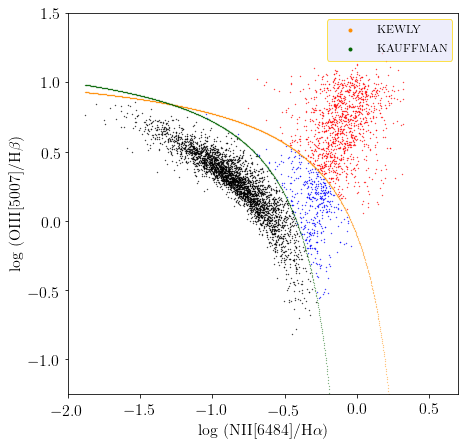

In [16]:
x=np.linspace(nii_ha.min(),nii_ha.max(),1000)
kewl_oiii = 0.61/((x)-0.47) + 1.19
kauffman_oiii = 0.61/((x)-0.05) + 1.3

fig=plt.figure(figsize=(7,7))  # set the size of the figure
ax=fig.add_subplot(111)


# for cond in ([(oiii_hb>kewl_oiii),((oiii_hb<kewl_oiii) & (oiii_hb>kauffman_oiii)),(oiii_hb<kauffman_oiii)]):
#     ax.plot((nii_ha[cond],oiii_hb[cond]),'.')

cond1=(oiii_hb>0.61/((nii_ha)-0.47) + 1.19)
ax.plot(nii_ha[cond1],oiii_hb[cond1],'.r',markersize=0.7)

cond2=((oiii_hb<0.61/((nii_ha)-0.47) + 1.19) & (oiii_hb> 0.61/((nii_ha)-0.05) + 1.3))
ax.plot(nii_ha[cond2],oiii_hb[cond2],'.',c='blue',markersize=0.7)

cond3=-cond1 & -cond2#(oiii_hb<kauffman_oiii)
ax.plot(nii_ha[cond3],oiii_hb[cond3],'.k',markersize=0.7)

print('AGN number:',np.sum(cond1),'out of',len(nii_ha))
print('AGN percentage:',100*np.sum(cond1)/(np.sum(cond1)+np.sum(cond2)+np.sum(cond3)))

# ax.set_facecolor('xkcd:black')

ax.plot(x,kewl_oiii,'.',c='darkorange',markersize=0.4,label=r'KEWLY')
ax.plot(x,kauffman_oiii,'.',c='darkgreen',markersize=0.4, label=r'KAUFFMAN')
ax.set_ylim(-1.25,1.5)
ax.set_xlim(-2,0.7)


ax.set_xlabel(r'log (NII[6484]/H$\alpha$)')
ax.set_ylabel(r'log (OIII[5007]/H$\beta$)')
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=15,framealpha=0.7,prop={'size':12})
plt.savefig('bpt11.png')
plt.show()

[-2.85344377 -2.79660072 -2.73975767 -2.68291462 -2.62607157 -2.56922853
 -2.51238548 -2.45554243 -2.39869938 -2.34185634 -2.28501329 -2.22817024
 -2.17132719 -2.11448414 -2.0576411  -2.00079805 -1.943955   -1.88711195
 -1.83026891 -1.77342586 -1.71658281 -1.65973976 -1.60289671 -1.54605367
 -1.48921062 -1.43236757 -1.37552452 -1.31868148 -1.26183843 -1.20499538
 -1.14815233 -1.09130928 -1.03446624 -0.97762319 -0.92078014 -0.86393709
 -0.80709405 -0.750251   -0.69340795 -0.6365649  -0.57972186 -0.52287881
 -0.46603576 -0.40919271 -0.35234966 -0.29550662 -0.23866357 -0.18182052
 -0.12497747 -0.06813443]


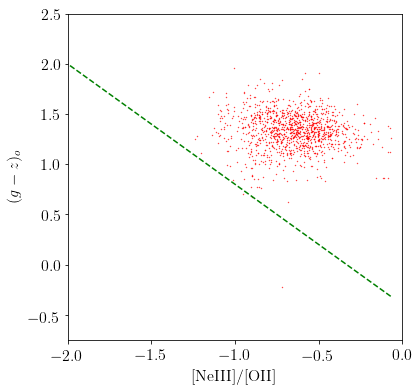

In [17]:
fig=plt.figure(figsize=(6,6))  # set the size of the figure
ax=fig.add_subplot(111)

x=np.linspace(ne_oii.min(),ne_oii.max())
print(x)
cond1=(oiii_hb>0.61/((nii_ha)-0.47) + 1.19)
ax.plot(ne_oii[cond1],color_corr[cond1],'.',c='red',markersize=0.7)
ax.set_ylim(-0.75,2.5)
ax.set_xlim(-2,0)
ax.set_xlabel('[NeIII]/[OII]')
ax.set_ylabel(r'$(g-z)_o$')
ax.plot(x,-1.2*x-0.4,'--g')
plt.savefig('tbt1.png')

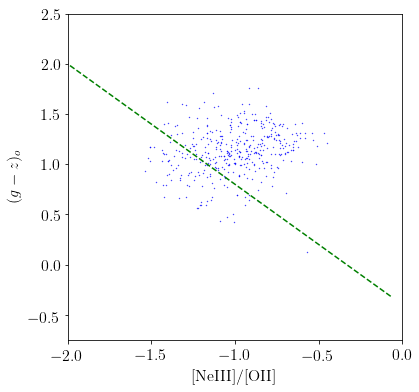

In [18]:
fig=plt.figure(figsize=(6,6))  # set the size of the figure
ax=fig.add_subplot(111)
cond2=((oiii_hb<0.61/((nii_ha)-0.47) + 1.19) & (oiii_hb> 0.61/((nii_ha)-0.05) + 1.3))
ax.plot(ne_oii[cond2],color_corr[cond2],'.',c='blue',markersize=0.7)
ax.set_ylim(-0.75,2.5)
ax.set_xlim(-2,0)
ax.set_xlabel('[NeIII]/[OII]')
ax.set_ylabel(r'$(g-z)_o$')
ax.plot(x,-1.2*x-0.4,'--g')
plt.savefig('tbt2.png')

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  after removing the cwd from sys.path.


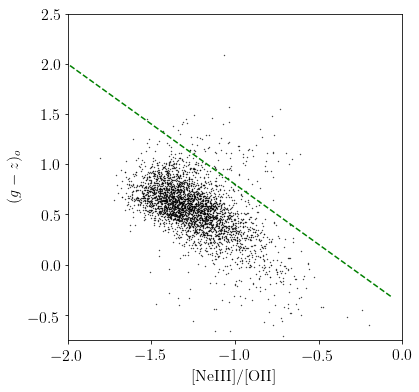

In [19]:
fig=plt.figure(figsize=(6,6))  # set the size of the figure
ax=fig.add_subplot(111)

cond3=-cond1 & -cond2
ax.plot(ne_oii[cond3],color_corr[cond3],'.',c='black',markersize=0.7)
ax.set_ylim(-0.75,2.5)
ax.set_xlim(-2,0)
ax.set_xlabel('[NeIII]/[OII]')
ax.set_ylabel(r'$(g-z)_o$')
ax.plot(x,-1.2*x-0.4,'--g')
plt.savefig('tbt3.png')

In [29]:
count=np.sum(color_corr[cond1]>(-1.2*ne_oii[cond1]-0.4))
print('TBT AGN count:',count,'out of',len(ne_oii))#(np.sum(cond1)+np.sum(cond2)+np.sum(cond3)))
print('TBT AGN percentage:',100*count/len(ne_oii))#(np.sum(cond1)+np.sum(cond2)+np.sum(cond3)))

TBT AGN count: 1208 out of 5089
TBT AGN percentage: 23.7374729809


In [30]:
count=np.sum(color_corr[cond1]>(-1.2*ne_oii[cond1]-0.4)) + np.sum(color_corr[cond2]>(-1.2*ne_oii[cond2]-0.4)) + np.sum(color_corr[cond3]>(-1.2*ne_oii[cond3]-0.4))
print('TBT AGN count:',count,'out of',len(ne_oii))#(np.sum(cond1)+np.sum(cond2)+np.sum(cond3)))
print('TBT AGN percentage:',100*count/len(ne_oii))#(np.sum(cond1)+np.sum(cond2)+np.sum(cond3)))

TBT AGN count: 1629 out of 5089
TBT AGN percentage: 32.0102181175


# TASK 3

In [22]:
cond= (vmc['snr1'].data > 5) & (vmc['snr2'].data > 5) & (vmc['snr3'].data > 5) & (vmc['match_dist']<3)
print(cond.sum())
w1=vmc['w1'].data
w1=w1[cond]
w2=vmc['w2'].data
w2=w2[cond]
w3=vmc['w3'].data
w3=w3[cond]
sub=vmc['subclass'].data
sub=sub[cond]
ra_wise=vmc['sdss_ra'].data
dec_wise=vmc['sdss_ra'].data

25753


25753


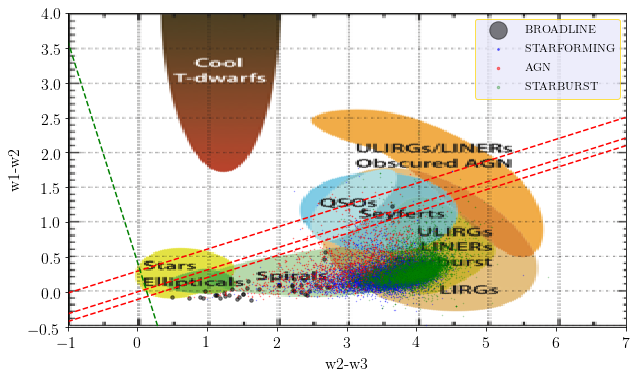

In [23]:
img=plt.imread('agn.png')
fig=plt.figure(figsize=(10,6))  # set the size of the figure
ax=fig.add_subplot(111)
w12=w1-w2
w23=w2-w3

yagn = w12#[w12>yth]

xagn = w23#[w12>yth]

sb=np.where((sub=='STARBURST'))# and (clas=='QSO'))
sf=np.where((sub=='STARFORMING'))# and (clas=='QSO'))
agn=np.where((sub=='AGN'))# and (clas=='QSO'))
br=np.where((sub=='BROADLINE'))# and (clas=='QSO'))

ax.plot(xagn[br],yagn[br],'.k',alpha=0.5,markersize=7,label='BROADLINE')
ax.plot(xagn[sf],yagn[sf],'.b',alpha=0.5,markersize=.7,label='STARFORMING')
ax.plot(xagn[agn],yagn[agn],'.r',alpha=0.5,markersize=1,label='AGN')
ax.plot(xagn[sb],yagn[sb],'.g',alpha=0.3,markersize=1,label='STARBURST')

print(len(w1))
x=np.linspace(-1,7,1000)

ax.plot(x,0.315*x,'--r',markersize=0.7)
ax.plot(x,0.315*x-0.110,'--r',markersize=0.7)
ax.plot(x,0.315*x+0.297,'--r',markersize=0.7)
ax.plot(x,-3.172*x + 0.436,'--g',markersize=0.7)

# ax.plot(w23,w12,'.',c='blue',markersize=0.7)
ax.set_xlim(-1,7)
ax.set_ylim(-0.5,4)
# ax.set_xlim(0,5)
# ax.set_ylim(-0.5,2)
ax.set_xlabel('w2-w3')
ax.set_ylabel('w1-w2')
ax.imshow(img,extent=[-1,7,-0.5,4])

yth=0.8
x1=2
x2=3.5
# ax.axvline(x=x1,ymax=(yth+0.5)/4.5,c='navy',linestyle='--')
# ax.axvline(x=x2,ymax=(yth++0.5)/4.5,c='darkgreen',linestyle='--')
# ax.axhline(y=0.8,c='darkorange',linestyle='--')
leg=plt.legend(loc=1,facecolor='lavender',edgecolor='gold',markerscale=5,framealpha=0.7,prop={'size':12})
plt.savefig('wise2.png')

In [27]:
cond=(w12>-3.172*w23 + 0.436) & (w12<0.315*w23 + 0.297) & (w12>0.315*w23-0.110)
count=np.sum(cond)
print(count)
print('Percentage of AGNs by WISE',100*count/len(w1))

cond=(sub_sdss=='AGN')
print('Percentage of AGNs by SDSS=',100*cond.sum()/len(sub))

174
Percentage of AGNs by WISE 0.6756494389
Percentage of AGNs by SDSS= 7.63794509378


In [28]:
cond=(w12>-3.172*w23 + 0.436) & (w12<0.315*w23 + 0.297) & (w12>0.315*w23-0.110)&(sub=='AGN')
print('Percentage of AGNs by WISE & SDSS=',100*cond.sum()/30000)

Percentage of AGNs by WISE & SDSS= 0.346666666667
